## PCA Calculation

Data shape: (1000, 500)


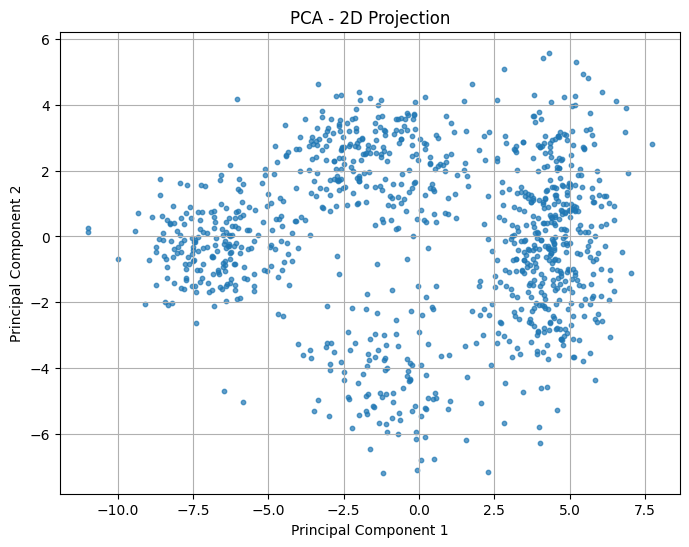

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap 
from sklearn.preprocessing import StandardScaler

data = np.loadtxt('pca_data.txt')

print('Data shape:', data.shape)
mean_cols = np.mean(data, axis=0)
centered_data = data - mean_cols
# std_dev_cols = np.std(data, axis=0)
# standardized_data = (data - mean_cols) / std_dev_cols

cov_matrix = np.cov(centered_data, rowvar=False)
# print('Covariance matrix:\n', cov_matrix)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# print('Eigenvalues:\n', eigenvalues)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
# print('Sorted eigenvalues:\n', eigenvalues)


final_data = centered_data.dot(eigenvectors[:, :2])
# print('Final data shape:', final_data.shape)

plt.figure(figsize=(8, 6))
plt.scatter(final_data[:, 0], final_data[:, 1], s=10, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()


## t-SNE Plot

Text(0, 0.5, 't-SNE Component 2')

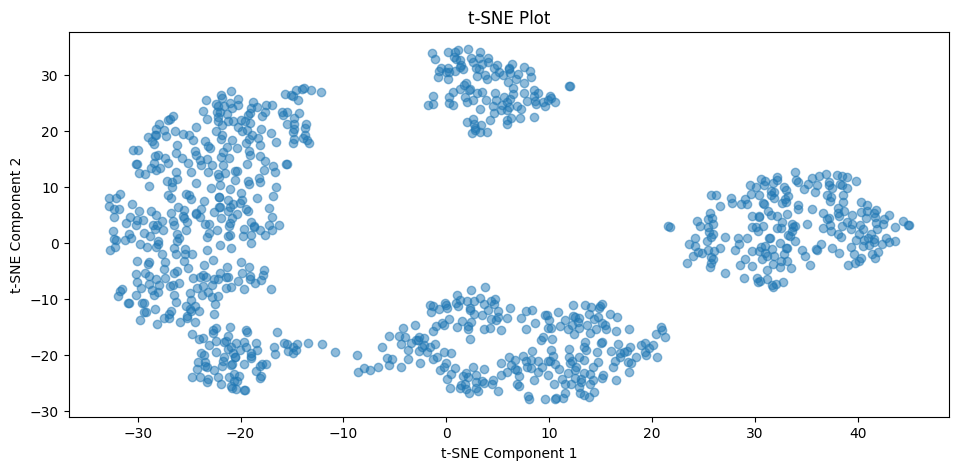

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create t-SNE plot
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')


## UMAP Plot

c:\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


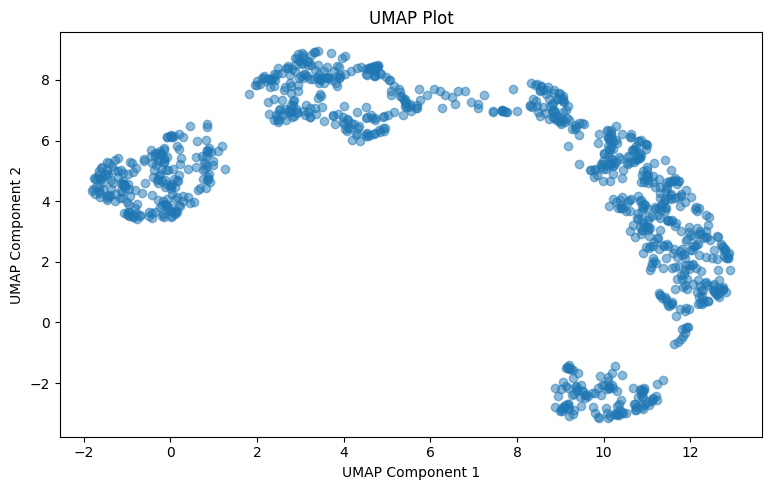

In [11]:
# Create UMAP plot
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(data_scaled)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
plt.title('UMAP Plot')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()



## E Step :
P(zi​=1∣xi​)=p1​⋅Poisson(xi​;λ1​)/p1⋅Poisson(xi​;λ1​)+p2​⋅Poisson(xi​;λ2​)​

## M Step
1. p1​=∑i=1toN ​P(zi​=1∣xi​)/N​,p2​=1−p1​ <br>
2. λ1​=∑i=1toN ​xi​⋅P(zi​=1∣xi​) /∑i=1toN ​P(zi​=1∣xi​) <br>
3. λ2​=∑i=1toN ​xi​⋅P(zi​=2∣xi​) /∑i=1toN ​P(zi​=2∣xi​)​ 

In [29]:
from scipy.stats import poisson

data = np.loadtxt("em_data.txt")  
N = len(data)


np.random.seed(42)
l_1, l_2 = np.random.rand(2) * 3
p_1 = 0.5 

max_epochs = 1000
diff = 1e-6
prev_l_1, prev_l_2, prev_p_1 = 0, 0, 0

for iteration in range(max_epochs):
    # E-step commbining 3 things
    P1 = p_1 * poisson.pmf(data, l_1)
    P2 = (1 - p_1) * poisson.pmf(data, l_2)
    temp = P1 / (P1 + P2)

    p_1 = np.mean(temp) # 1 
    l_1 = np.sum(temp * data) / np.sum(temp) # 2 
    l_2 = np.sum((1 - temp) * data) / np.sum(1 - temp) # 3


    if (
        abs(l_1 - prev_l_1) < diff
        and abs(l_2 - prev_l_2) < diff
        and abs(p_1 - prev_p_1) < diff
    ):
        print(f"Converged after {iteration} iterations.")
        break
    
    prev_l_1, prev_l_2, prev_p_1 = l_1, l_2, p_1

print(f"Estimated Mean (With Family Planning): {l_1}")
print(f"Estimated Mean (Without Family Planning): {l_2}")
print(f"Proportion (With Family Planning): {p_1}")
print(f"Proportion (Without Family Planning): {1 - p_1}")

Converged after 172 iterations.
Estimated Mean (With Family Planning): 1.782357604977479
Estimated Mean (Without Family Planning): 4.910676308244854
Proportion (With Family Planning): 0.3559983537104689
Proportion (Without Family Planning): 0.644001646289531
